## Transfer Learning Inception V3 using Keras

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
train_path = '/gdrive/My Drive/Colab Notebooks/Dataset/train'
valid_path = '/gdrive/My Drive/Colab Notebooks/Dataset/test'


Mounted at /gdrive


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/gdrive/My Drive/Colab Notebooks/Dataset/train')
print(folders)

['/gdrive/My Drive/Colab Notebooks/Dataset/train']


In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(10, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
training_set = train_datagen.flow_from_directory('/gdrive/My Drive/Colab Notebooks/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Mounted at /gdrive
Found 18345 images belonging to 10 classes.


In [15]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
test_set = test_datagen.flow_from_directory('/gdrive/My Drive/Colab Notebooks/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Mounted at /gdrive
Found 4585 images belonging to 10 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1147/1147 [==============================] - 8149s 7s/step - loss: 4.6666 - accuracy: 0.6019 - val_loss: 3.0753 - val_accuracy: 0.7830
Epoch 2/10
1147/1147 [==============================] - 1642s 1s/step - loss: 3.4396 - accuracy: 0.7868 - val_loss: 3.5133 - val_accuracy: 0.7917
Epoch 3/10
1147/1147 [==============================] - 1642s 1s/step - loss: 3.3772 - accuracy: 0.8066 - val_loss: 2.7744 - val_accuracy: 0.8327
Epoch 4/10
1147/1147 [==============================] - 1640s 1s/step - loss: 3.3372 - accuracy: 0.8358 - val_loss: 4.1161 - val_accuracy: 0.8059
Epoch 5/10
1147/1147 [==============================] - 1635s 1s/step - loss: 2.8895 - accuracy: 0.8564 - val_loss: 2.8858 - val_accuracy: 0.8554
Epoch 6/10
1147/1147 [==============================] - 1630s 1s/step - loss: 2.6057 - accuracy: 0.8689 - val_loss: 3.6179 - val_accuracy: 0.8345
Epoch 7/10
1147/1147 [==============================] - 1626s 1s/step - loss: 2.6346 - accuracy: 0.8763 - val_loss: 3.1683 -

In [17]:
import matplotlib.pyplot as plt

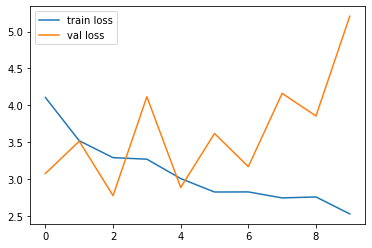

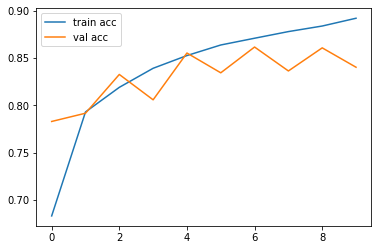

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inception.h5')